In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mesa_reader as mr

In [2]:
mearth = 5.97e27
msun = 1.9892e33
rearth = 6.371008e8
rsun = 6.9598e10
rfrac = rsun/rearth
mfrac = msun/mearth

In [15]:
def formatstring(myfloat):
    return '%.5f'%myfloat

In [29]:
mpList = list(np.linspace(7.0,8.0,11))
for i, m in enumerate(mpList):
    mpList[i] = formatstring(m)
    
fList = list(np.logspace(-4,np.log10(2*(10**-2)),10))
for j, f in enumerate(fList):
    fList[j] = formatstring(f)
    
entList = [7.28,7.28,7.29,7.29,7.3,7.3,7.3,7.31,7.31,7.32,7.32]
for k, ent in enumerate(entList):
    entList[k] = formatstring(ent)

In [5]:
def envelope_fraction(history):
    return history.envelope_mass/(history.star_mass*msun)

def calcX(history):
    return history.Hydrogen_Mass / history.envelope_mass

def calcY(history):
    return history.He4_Mass / history.envelope_mass

def calcZ(history):    
    return 1 - calcX(history) - calcY(history)

def deltaf(history):
    initf = history.envelope_mass[0] / (history.star_mass[0] * msun)
    finf = history.envelope_mass[-1] / (history.star_mass[-1] * msun)
    return finf - initf 

def deltam(history):
    initm = history.star_mass[0] * mfrac
    finm = history.star_mass[-1] * mfrac
    return finm - initm

In [97]:
'''masses_old = [] 
radii_old = [] 
fs_old = []
deltams_old = []
deltafs_old = []
ages_old = []

for i, m in enumerate(mpList):
    ent = entList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('LOGS/hist_evolve_%s_%s_0.24_0.02_0.03392_%s_0.1.data'%(m,f,ent),file_type='log')
        
        masses_old.append(h.star_mass*mfrac)
        radii_old.append(h.radius*rfrac)
        fs_old.append(envelope_fraction(h))
        
        deltams_old.append(deltam(h))
        deltafs_old.append(deltaf(h))
        ages_old.append(h.star_age)'''

"masses_old = [] \nradii_old = [] \nfs_old = []\ndeltams_old = []\ndeltafs_old = []\nages_old = []\n\nfor i, m in enumerate(mpList):\n    ent = entList[i]\n    \n    for j, f in enumerate(fList):\n        h = mr.MesaData('LOGS/hist_evolve_%s_%s_0.24_0.02_0.03392_%s_0.1.data'%(m,f,ent),file_type='log')\n        \n        masses_old.append(h.star_mass*mfrac)\n        radii_old.append(h.radius*rfrac)\n        fs_old.append(envelope_fraction(h))\n        \n        deltams_old.append(deltam(h))\n        deltafs_old.append(deltaf(h))\n        ages_old.append(h.star_age)"

In [30]:
print(mpList)
print(fList)

['7.00000', '7.10000', '7.20000', '7.30000', '7.40000', '7.50000', '7.60000', '7.70000', '7.80000', '7.90000', '8.00000']
['0.00010', '0.00018', '0.00032', '0.00058', '0.00105', '0.00190', '0.00342', '0.00616', '0.01110', '0.02000']


In [51]:
newmpList = [7.0,7.1,7.2]
for i, m in enumerate(newmpList):
    newmpList[i] = formatstring(m)

masses_str = []
radii_str = [] 
fs_str = []
deltams_str = []
deltafs_str = []
ages_str = []

for i, m in enumerate(newmpList):
    ent = entList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/debug_mar4/str3/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses_str.append(h.star_mass*mfrac)
        radii_str.append(h.radius*rfrac)
        fs_str.append(envelope_fraction(h))
        
        deltams_str.append(deltam(h))
        deltafs_str.append(deltaf(h))
        ages_str.append(h.star_age)

In [32]:
masses_exp = []
radii_exp = [] 
fs_exp = []
deltams_exp = []
deltafs_exp = []
ages_exp = []

for i, m in enumerate(mpList):
    ent = entList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/debug_mar4/expstr2/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses_exp.append(h.star_mass*mfrac)
        radii_exp.append(h.radius*rfrac)
        fs_exp.append(envelope_fraction(h))
        
        deltams_exp.append(deltam(h))
        deltafs_exp.append(deltaf(h))
        ages_exp.append(h.star_age)
        

In [55]:
masses_d = []
radii_d = [] 
fs_d = []
deltams_d = []
deltafs_d = []
ages_d = []

for i, m in enumerate(newmpList):
    ent = entList[i]
    
    for j, f in enumerate(fList):
        h = mr.MesaData('data/debug_mar4/double/hist_evolve_%s_%s_0.24000_0.02000_0.03392_%s_0.10000.data'%(m,f,ent),file_type='log')
        
        masses_d.append(h.star_mass*mfrac)
        radii_d.append(h.radius*rfrac)
        fs_d.append(envelope_fraction(h))
        
        deltams_d.append(deltam(h))
        deltafs_d.append(deltaf(h))
        ages_d.append(h.star_age)

In [75]:
'''indices5gyr_exp = []
for i in range(len(ages_exp)):
    arrage = np.array(ages_exp[i])
    indices5gyr_exp.append(np.argmin((arrage - 5.0e9)**2))

print(indices5gyr_exp)

indices5gyr_str = []
for i in range(len(ages_str)):
    arrage = np.array(ages_str[i])
    indices5gyr_str.append(np.argmin((arrage - 5.0e9)**2))

print(indices5gyr_str)'''

[362, 325, 306, 344, 312, 282]
[362, 325, 306, 344, 312, 285]


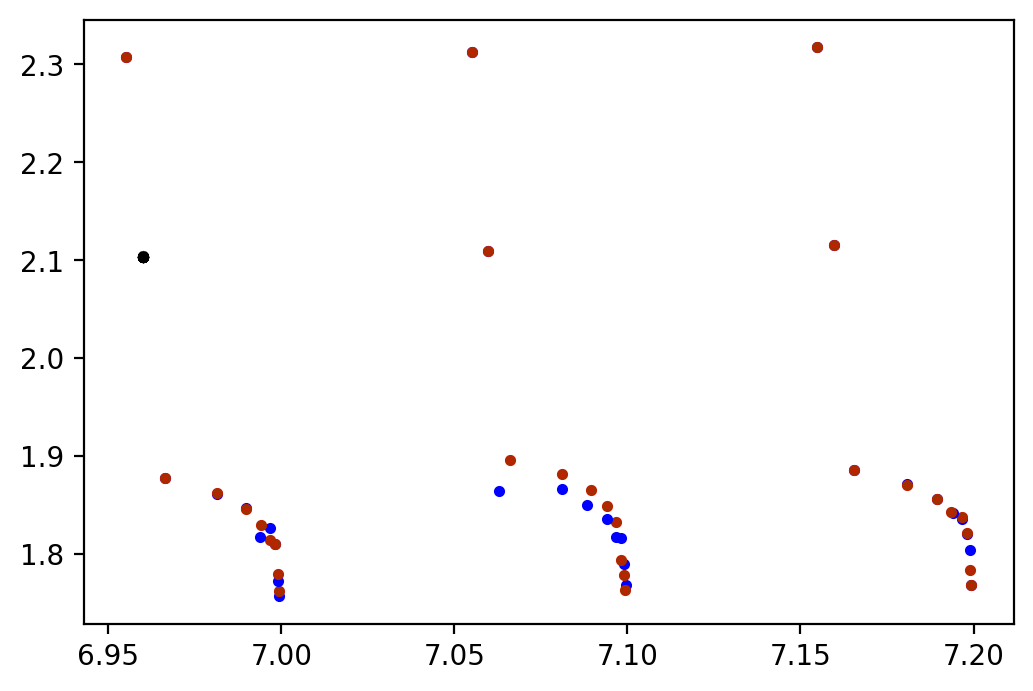

In [63]:
fig = plt.figure()
ax = plt.gca()

for i in range(len(masses_str)):
    plt.plot(masses_str[i][-1],radii_str[i][-1],'b.')
    plt.plot(masses_exp[i][-1],radii_exp[i][-1],'r.',alpha=1)
    plt.plot(masses_d[i][-1],radii_d[i][-1],'g.',alpha=0.25)
    plt.plot(2.0888128817112756e-5*mfrac,1.9256609164142409e-2*rfrac,'k.')
    
fig.set_dpi(200)
#ax.set_xlim(6.95, 7.25)
#ax.set_ylim(1.6218472596443287, 2.886969765995583)
#ax.set_ylim(1.7,2.0)

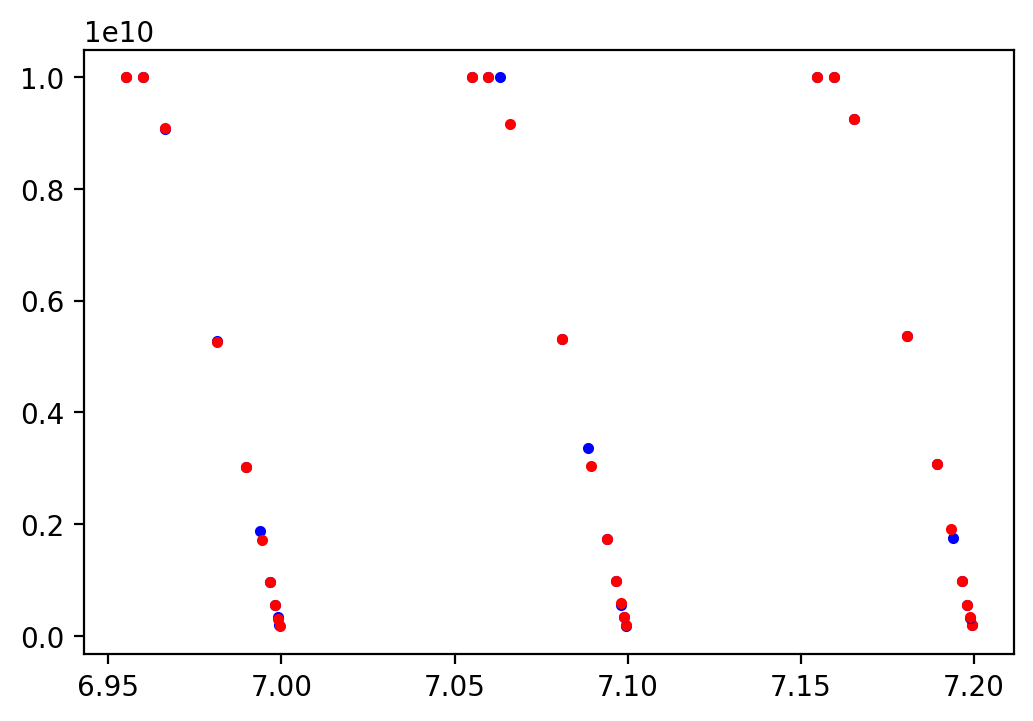

In [54]:
fig = plt.figure()
ax = plt.gca()

for i in range(len(masses_str)):
    plt.plot(masses_str[i][-1],ages_str[i][-1],'b.')
    plt.plot(masses_exp[i][-1],ages_exp[i][-1],'r.')
    
fig.set_dpi(200)

In [37]:
np.linspace(7.0,7.2,3)

array([7. , 7.1, 7.2])